# Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_IxoE5JN.csv', index_col = 'row_id')
test = pd.read_csv('test_WudNWDM.csv', index_col = 'row_id')
sample = pd.read_csv('sample_submission_jn0a7vR.csv')
train.head()

,datetime,energy
row_id,,
1,2008-03-01 00:00:00,1259.985563
2,2008-03-01 01:00:00,1095.541500
3,2008-03-01 02:00:00,1056.247500
4,2008-03-01 03:00:00,1034.742000
5,2008-03-01 04:00:00,1026.334500


## Getting general info about the dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94992 entries, 1 to 94992
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  94992 non-null  object 
 1   energy    93092 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [4]:
train.shape

(94992, 2)

## Find the percentage of null values in the dataset

In [5]:
train.isna().sum()/train.shape[0]

datetime    0.000000
energy      0.020002
dtype: float64

### Since the percentage of null data is just 2% decided to drop them all

In [6]:
train.dropna(inplace = True)

In [7]:
train.isna().sum()

datetime    0
energy      0
dtype: int64

## Combining the test and train data for Preproccessing

In [8]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test])
df.tail()

,datetime,energy,source
row_id,,,
121292,2021-12-31 19:00:00,NaN,test
121293,2021-12-31 20:00:00,NaN,test
121294,2021-12-31 21:00:00,NaN,test
121295,2021-12-31 22:00:00,NaN,test
121296,2021-12-31 23:00:00,NaN,test


### The datetime feature is in object format so converting it into Datetime format for further proccessing 

In [9]:
df.datetime= pd.to_datetime(df.datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119396 entries, 1 to 121296
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  119396 non-null  datetime64[ns]
 1   energy    93092 non-null   float64       
 2   source    119396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.6+ MB


In [10]:
print(train.isna().sum())
print(df.isna().sum())

datetime    0
energy      0
source      0
dtype: int64
datetime        0
energy      26304
source          0
dtype: int64


In [11]:
print(train.duplicated().sum())
print(df.duplicated().sum())

0
0


### Getting a sense of the data thru plotting the energy demand over the years. We can infer that the energy requirement increases steadily over the years

<AxesSubplot:xlabel='row_id', ylabel='energy'>

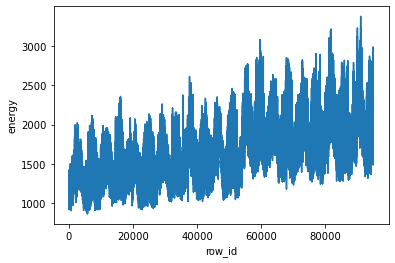

In [12]:
sns.lineplot(data = train, x = 'row_id', y = 'energy')

### Seperating the datetime column into multiple columns for better features

In [13]:
df['date'] = pd.to_datetime(df['datetime']).dt.day.astype(int)
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

In [14]:
df['week'] = pd.to_datetime(df['datetime']).dt.weekday

In [15]:
df.head(50)

,datetime,energy,source,date,month,year,hour,week
row_id,,,,,,,,
1,2008-03-01 00:00:00,1259.985563,train,1,3,2008,0,5
2,2008-03-01 01:00:00,1095.541500,train,1,3,2008,1,5
3,2008-03-01 02:00:00,1056.247500,train,1,3,2008,2,5
4,2008-03-01 03:00:00,1034.742000,train,1,3,2008,3,5
5,2008-03-01 04:00:00,1026.334500,train,1,3,2008,4,5
6,2008-03-01 05:00:00,1033.768500,train,1,3,2008,5,5
7,2008-03-01 06:00:00,1086.780000,train,1,3,2008,6,5
8,2008-03-01 07:00:00,1211.742000,train,1,3,2008,7,5
9,2008-03-01 08:00:00,1293.693000,train,1,3,2008,8,5


In [16]:
df.month.nunique()

12

In [17]:
df.date.nunique()

31

In [18]:
df.hour.nunique()

24

In [19]:
df.year.nunique()

14

In [20]:
df.week.nunique()

7

## Plotting the newly created features against the energy demand

Text(0.5, 1.0, 'Month vs Energy')

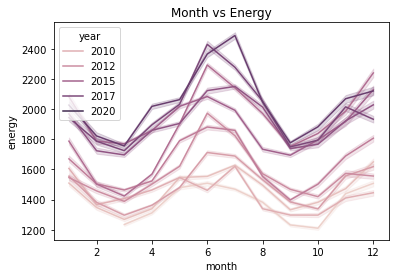

In [21]:
sns.lineplot(x = df.month, y = df.energy, hue = df.year)
plt.title('Month vs Energy')

In [22]:
#We see that the trend of energy demand for the months of 6 & 7 is high and 3 & 10 is low 

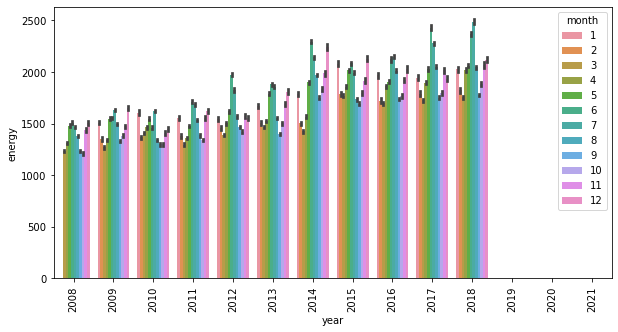

In [23]:
plt.figure(figsize = (10,5))
sns.barplot(x = df.year, y = df.energy, hue = df.month)
plt.xticks(rotation = 90)
plt.show()

In [24]:
train.isna().sum()

datetime    0
energy      0
source      0
dtype: int64

# Importing neccessary libraries for the model

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [26]:
X = df[df['source']== 'train'].drop(columns = ['energy', 'source', 'datetime'])
X

,date,month,year,hour,week
row_id,,,,,
1,1,3,2008,0,5
2,1,3,2008,1,5
3,1,3,2008,2,5
4,1,3,2008,3,5
5,1,3,2008,4,5
...,...,...,...,...,...
94988,31,12,2018,19,0
94989,31,12,2018,20,0
94990,31,12,2018,21,0


In [27]:
final_X = df[df['source']== 'test'].drop(columns = ['energy', 'source', 'datetime'])
final_X

,date,month,year,hour,week
row_id,,,,,
94993,1,1,2019,0,1
94994,1,1,2019,1,1
94995,1,1,2019,2,1
94996,1,1,2019,3,1
94997,1,1,2019,4,1
...,...,...,...,...,...
121292,31,12,2021,19,4
121293,31,12,2021,20,4
121294,31,12,2021,21,4


In [28]:
y = train.energy
y

row_id
1        1259.985563
2        1095.541500
3        1056.247500
4        1034.742000
5        1026.334500
            ...     
94988    2528.446800
94989    2461.883600
94990    2365.994400
94991    2342.942800
94992    2180.217600
Name: energy, Length: 93092, dtype: float64

In [29]:
#The train and test data is split with test size as 15% of the total train data.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((79128, 5), (13964, 5), (79128,), (13964,))

In [31]:
#The data is non - linear in nature so decided to move forward with a higher degree of polynomial along with linear regression

In [32]:
poly= PolynomialFeatures(degree=7, include_bias=False)

In [33]:
poly_x = poly.fit_transform(X_train)

In [34]:
poly_model = LinearRegression()

In [35]:
poly_model.fit(poly_x, y_train)

LinearRegression()

In [36]:
poly_predict = poly_model.predict(poly_x)

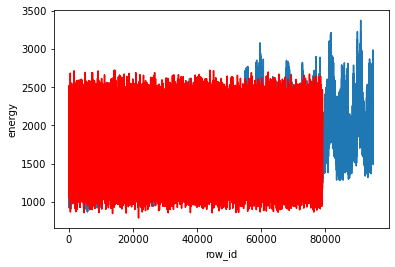

In [37]:
sns.lineplot(data = train,x = 'row_id', y = 'energy')
plt.plot(poly_predict, color = 'red')

In [38]:
poly_predict

array([1985.02584618, 1899.71852082, 1434.99406976, ..., 2075.02220505,
       1287.03481072, 1967.59783334])

In [39]:
mean_squared_error(y_train, poly_predict, squared = False)# finding the RMSE error 

163.09173576403182

In [40]:
poly_Xtest = poly.fit_transform(X_test)

In [41]:
y_poly_test = poly_model.predict(poly_Xtest)

In [42]:
mean_squared_error(y_test, y_poly_test, squared = False)

163.683313120217

In [43]:
poly_final_X = poly.fit_transform(final_X)

In [44]:
final_y = poly_model.predict(poly_final_X)

In [45]:
final_y

array([1794.81892747, 1596.80669945, 1474.52430791, ..., 1958.89436215,
       1824.32990235, 1601.05165261])

In [46]:
sample

,row_id,energy
0,94993,1702.995014
1,94994,1702.995014
2,94995,1702.995014
3,94996,1702.995014
4,94997,1702.995014
...,...,...
26299,121292,1702.995014
26300,121293,1702.995014
26301,121294,1702.995014
26302,121295,1702.995014


In [47]:
sample['energy'] = final_y

In [48]:
sample

,row_id,energy
0,94993,1794.818927
1,94994,1596.806699
2,94995,1474.524308
3,94996,1420.542302
4,94997,1424.202153
...,...,...
26299,121292,2084.674687
26300,121293,2038.365040
26301,121294,1958.894362
26302,121295,1824.329902


In [49]:
sample.to_csv("poly.csv", index= False)